<a href="https://colab.research.google.com/github/HardikNickam/colab-eda/blob/main/EDA_FeatureEngerring_USA_VISA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA

In [31]:
#EasyVisa
import seaborn as sns
import plotly.express as px
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

data

In [32]:
data = pd.read_csv("EasyVisa.csv")
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


shape of data

In [33]:
data.shape

(25480, 12)

summary of data

In [34]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


information of data

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# EDA

In [36]:


# Assuming `data` is your DataFrame
# numericFeatures = [feature for feature in data.columns if pd.api.types.is_numeric_dtype(data[feature])]
# categoricalFeatures = [feature for feature in data.columns if pd.api.types.is_object_dtype(data[feature])]
numericFeatures = [feature for feature in data.columns if data[feature].dtype != 'object']
categoricalFeatures = [feature for feature in data.columns if data[feature].dtype == 'object']

print('Number of numeric features: {}\nNumeric features names: {}'.format(len(numericFeatures), numericFeatures))
print('\nNumber of categorical features: {}\nCategorical features names: {}'.format(len(categoricalFeatures), categoricalFeatures))


Number of numeric features: 3
Numeric features names: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Number of categorical features: 9
Categorical features names: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


percentage of data columns availabe in the data

In [37]:
#proportion of each categorical features
#can remove case id as the given value is the same ie 0.002....
#value is same as case_id is unique

for col in categoricalFeatures:
  print(data[col].value_counts(normalize=True)*100)
  print('--------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------
region_of_employment
Northeast    28.237834
South        27.539246
Wes


---
insights:


*  case_id : has unique value so it can be dropped.
*  continent:Asia has high baised so we can categorise in asia and other categories
* unit of wage: most of the contract seems to be yearly.





---
Univariate analysis


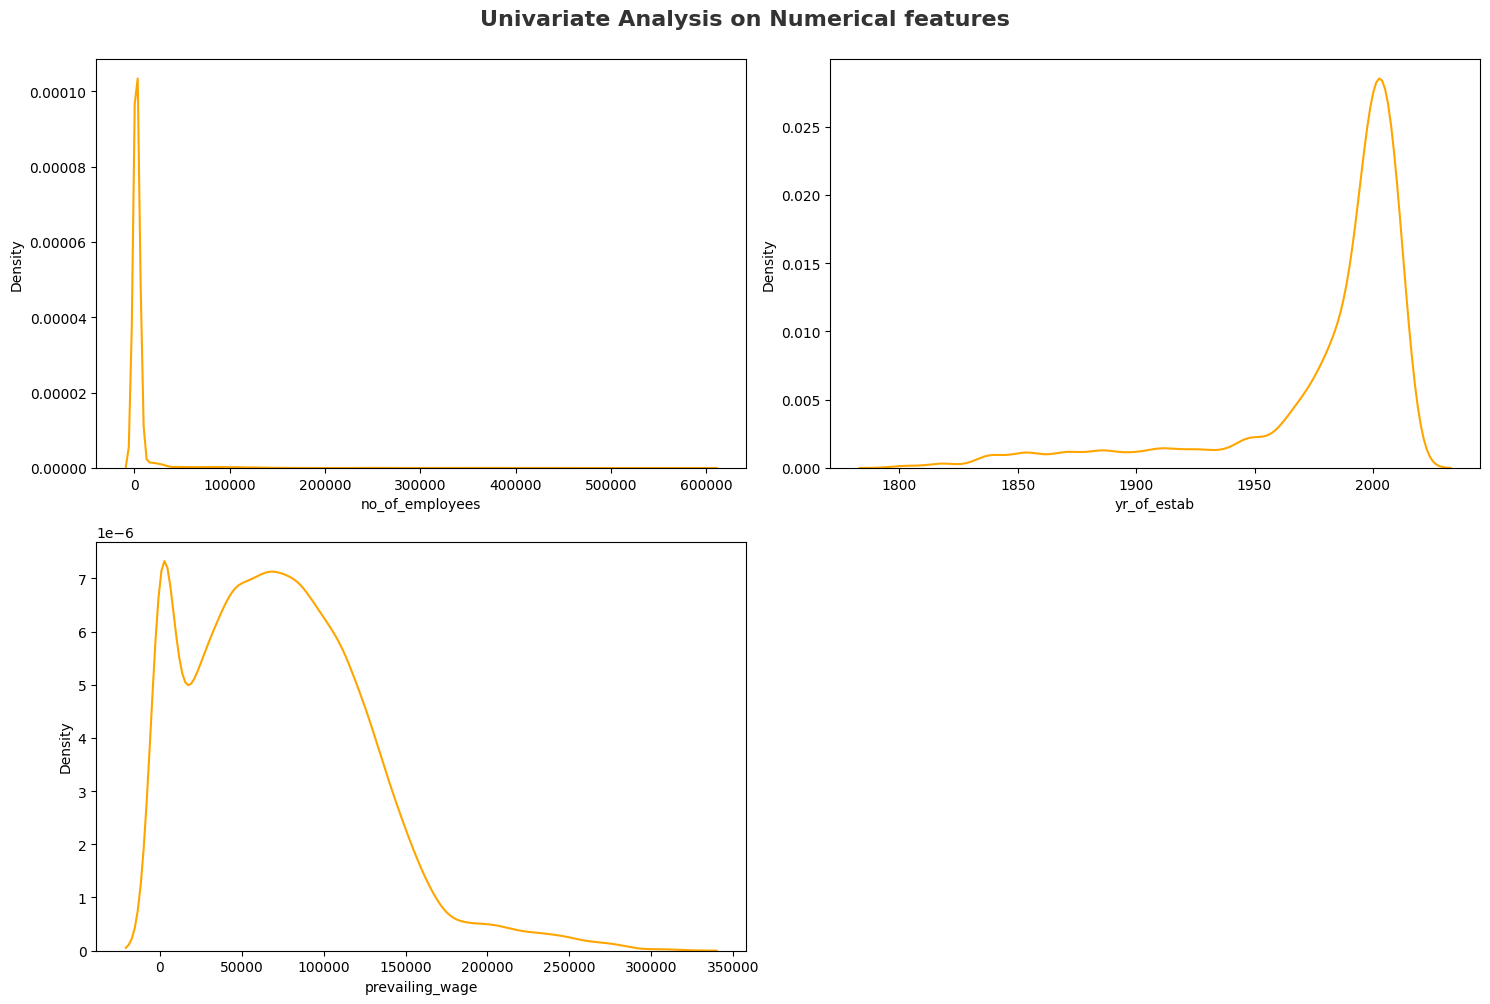

In [38]:
#analysis of one variable - univariate analysis

plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis on Numerical features', fontsize=16,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(numericFeatures)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=data[numericFeatures[i]],color='orange')
  plt.xlabel(numericFeatures[i])
  plt.tight_layout()


left scwed and right scewed  first two figure

*   no_of_employees looks skewed
*   privailing-wage is a  discrete feature
*   yr_of_estab is a right skewed distribution
---
skewness happens due to outlyiers

can use :power transformation,zscore,log transformation etc



#### Categorical Fetures

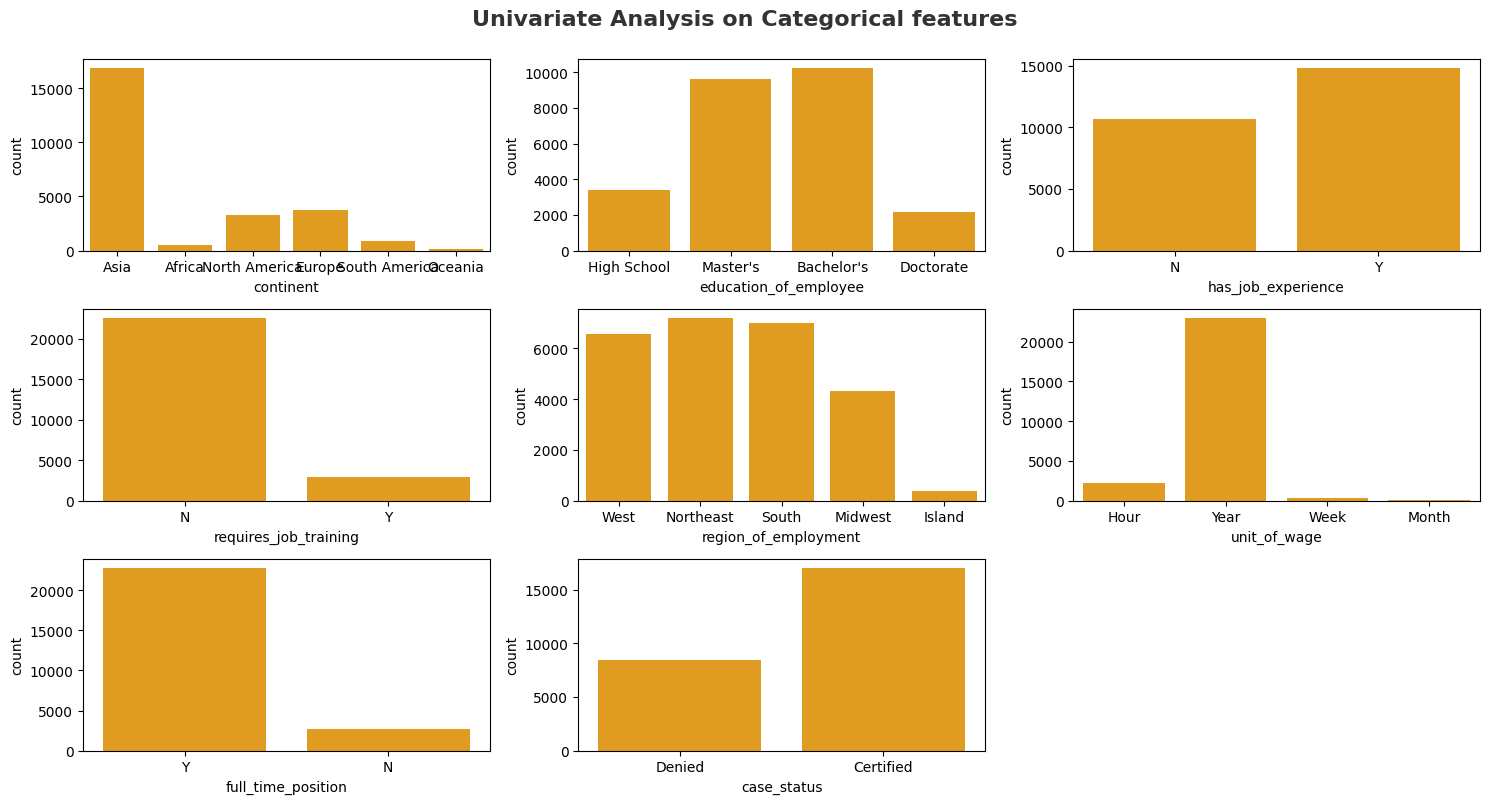

In [46]:


if 'case_id' in categoricalFeatures:
  categoricalFeatures.remove('case_id')

plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis on Categorical features', fontsize=16,fontweight='bold',alpha=0.8,y=1)
for i in range(0,len(categoricalFeatures)):
  plt.subplot(3,3,i+1)
  sns.countplot(x=data[categoricalFeatures[i]],color='orange')
  plt.xlabel(categoricalFeatures[i])
  plt.tight_layout()


*continent, required_job_training,unit_of_wage,full_time_position* is **dominated/biased** with single category

### Multivariate Analaysis

In [48]:
# discrete and continious features seperate

discreteFeatures=[features  for features in numericFeatures if len(data[features].unique())<=25]
continousFeatures=[features  for features in numericFeatures if len(data[features].unique())>25]

print('Number of descrite features : {}\ndescrite featuress: {}'.format(len(discreteFeatures), discreteFeatures))
print('\nNumber of continous features: {}\ncontinous features names: {}'.format(len(continousFeatures), continousFeatures))

Number of descrite features : 0
descrite featuress: []

Number of continous features: 3
continous features names: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Multicollinearity
* chi square

In [49]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [61]:
from scipy.stats import chi2_contingency
chi2_test = []

for  feature in categoricalFeatures:
  if chi2_contingency(pd.crosstab(data['case_status'],data[feature]))[1]<0.05:
    chi2_test.append("rejected null hypothesis")
  else:
    chi2_test.append('falied to reject null hypithesis')

result = pd.DataFrame(data=[categoricalFeatures,chi2_test]).T
result.columns = ['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,rejected null hypothesis
1,education_of_employee,rejected null hypothesis
2,has_job_experience,rejected null hypothesis
3,requires_job_training,falied to reject null hypithesis
4,region_of_employment,rejected null hypothesis
5,unit_of_wage,rejected null hypothesis
6,full_time_position,rejected null hypothesis
7,case_status,rejected null hypothesis


* **requires_job_training**  failes to reject null hypothesis  
---
it doesnt corelate with the target columns

In [63]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


Box plot : to check the outliers

In [68]:
continousFeatures

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

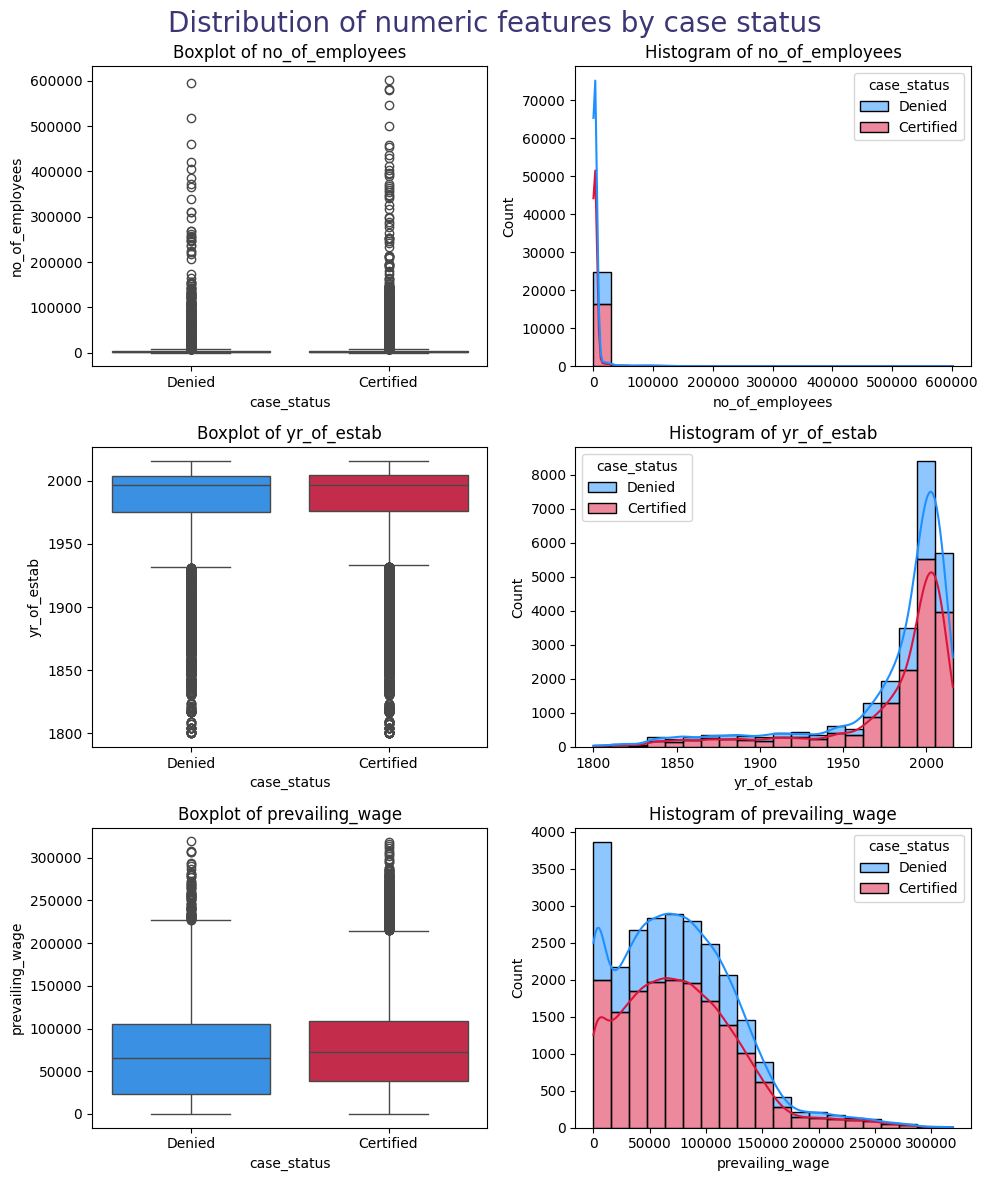

In [70]:
clr_1 = ['#1E90FF','#DC143C']
fig,ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of numeric features by case status',color ='#3C3774',fontsize=20,ha='center')
for i,col in enumerate(continousFeatures):
  sns.boxplot(data=data,x='case_status',y=col,palette=clr_1,ax=ax[i,0])
  ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
  sns.histplot(data=data,x=col,hue='case_status',bins=20,kde=True,multiple='stack',palette=clr_1,ax=ax[i,1])
  ax[i,1].set_title(f'Histogram of {col}',fontsize=12)

fig.tight_layout()


cuurent analysis:
* **No of employess has many potliers as stated by the boxplot**
*   no_of_employees looks skewed
*   privailing-wage is a  discrete feature
*   yr_of_estab is a right skewed distribution
*   NO missing values in dataset
*   cas_id can be dropped
*   case_status columns is the target to predict

###Visulatozation

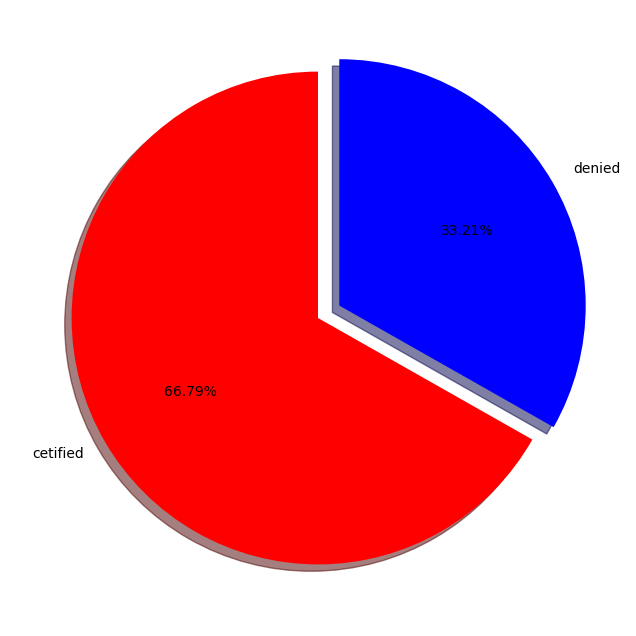

In [81]:
percentage = data.case_status.value_counts(normalize=True)*100
labels=["cetified","denied"]

fig,ax = plt.subplots(figsize=(15,8))
explode = (0,0.1)
colors=['red','blue']
ax.pie(percentage,labels=labels,startangle=90,explode=explode,colors=colors,shadow=True,autopct='%1.2f%%')
plt.show()

66% cetified only 33% denied
* thus target data is **imbalanced**
* can use **resampling** or **smot** to target *imbalance data*

---
does continent has any impact on visa acceptance

In [106]:
data.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

most certified:europe
least certified = South America

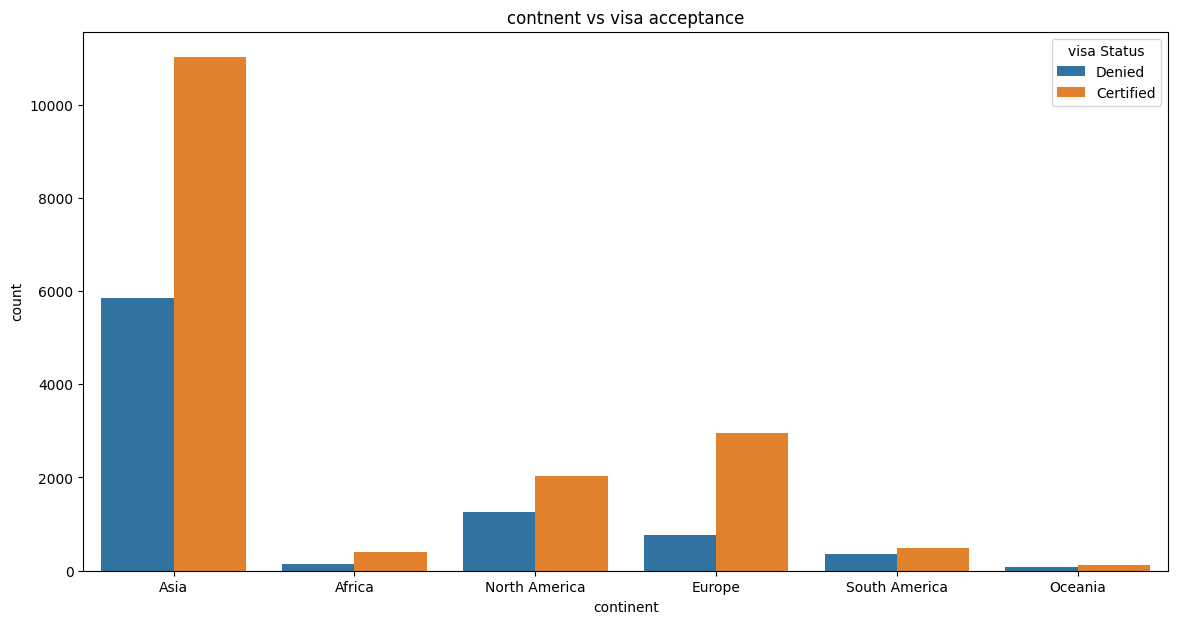

In [107]:
plt.subplots(figsize=(14,7))
sns.countplot(x='continent', hue='case_status',data=data)
plt.title('contnent vs visa acceptance')
# plt.xlabel('Continent')
# plt.ylabel('count')
plt.legend(title="visa Status", fancybox=True)
plt.show()

percentage certified

In [108]:
cc = data.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

In [109]:
cc

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [110]:
df2=pd.DataFrame(cc)

In [111]:
df2

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

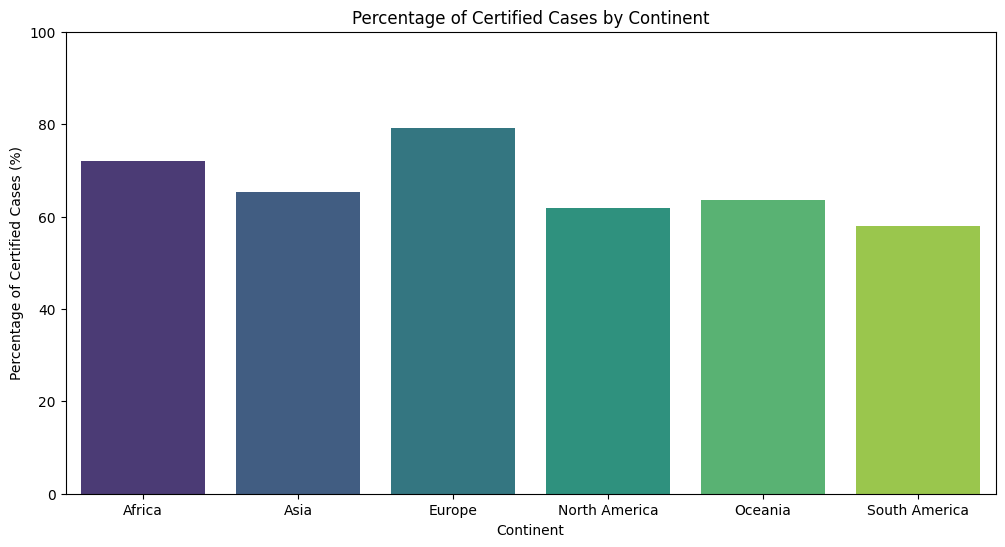

In [112]:
# df2 = data.merge(cc, on=['continent', 'case_status'], how='left')

# df2.rename(columns={'proportion': 'acceptance_rate'}, inplace=True)
certified_data = cc[cc.index.get_level_values('case_status') == 'Certified']

plt.figure(figsize=(12, 6))
sns.barplot(data=certified_data, x='continent', y='proportion', palette='viridis')


plt.title('Percentage of Certified Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Percentage of Certified Cases (%)')
plt.ylim(0, 100)

plt.show()


* asia highest applicants followed by europe
* highest application getting certified are from europe followed by africa

In [113]:
 data.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

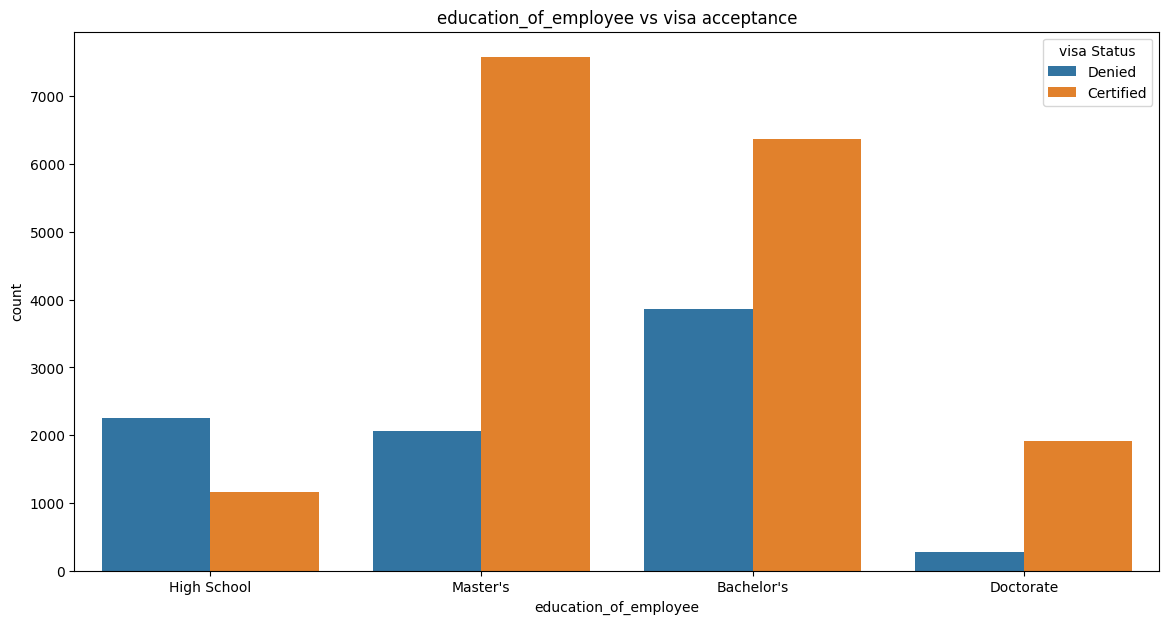

In [114]:
plt.subplots(figsize=(14,7))
sns.countplot(x='education_of_employee', hue='case_status',data=data)
plt.title('education_of_employee vs visa acceptance')
# plt.xlabel('Continent')
# plt.ylabel('count')
plt.legend(title="visa Status", fancybox=True)
plt.show()

masters and doctrerates havehigher chances of being accepted

In [115]:
 data.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

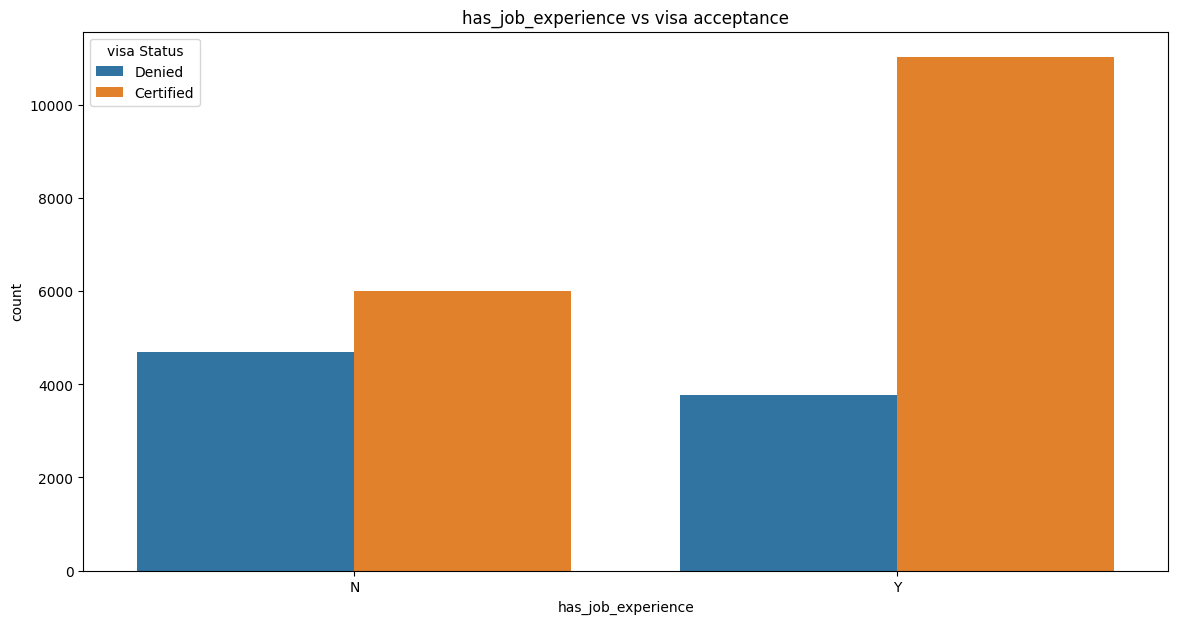

In [116]:
plt.subplots(figsize=(14,7))
sns.countplot(x='has_job_experience', hue='case_status',data=data)
plt.title('has_job_experience vs visa acceptance')
# plt.xlabel('Continent')
# plt.ylabel('count')
plt.legend(title="visa Status", fancybox=True)
plt.show()

more acceptance for having job experience

In [117]:
 data.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

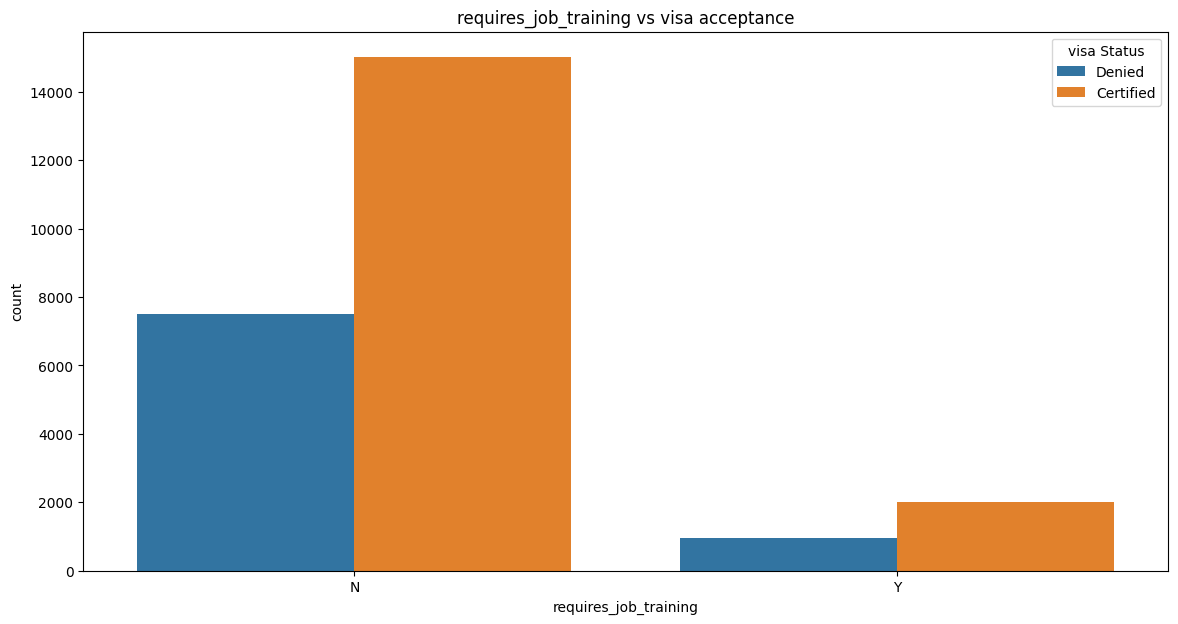

In [118]:
plt.subplots(figsize=(14,7))
sns.countplot(x='requires_job_training', hue='case_status',data=data)
plt.title('requires_job_training vs visa acceptance')
# plt.xlabel('Continent')
# plt.ylabel('count')
plt.legend(title="visa Status", fancybox=True)
plt.show()

more rejection for reqi=uiring job training

In [119]:
 data.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

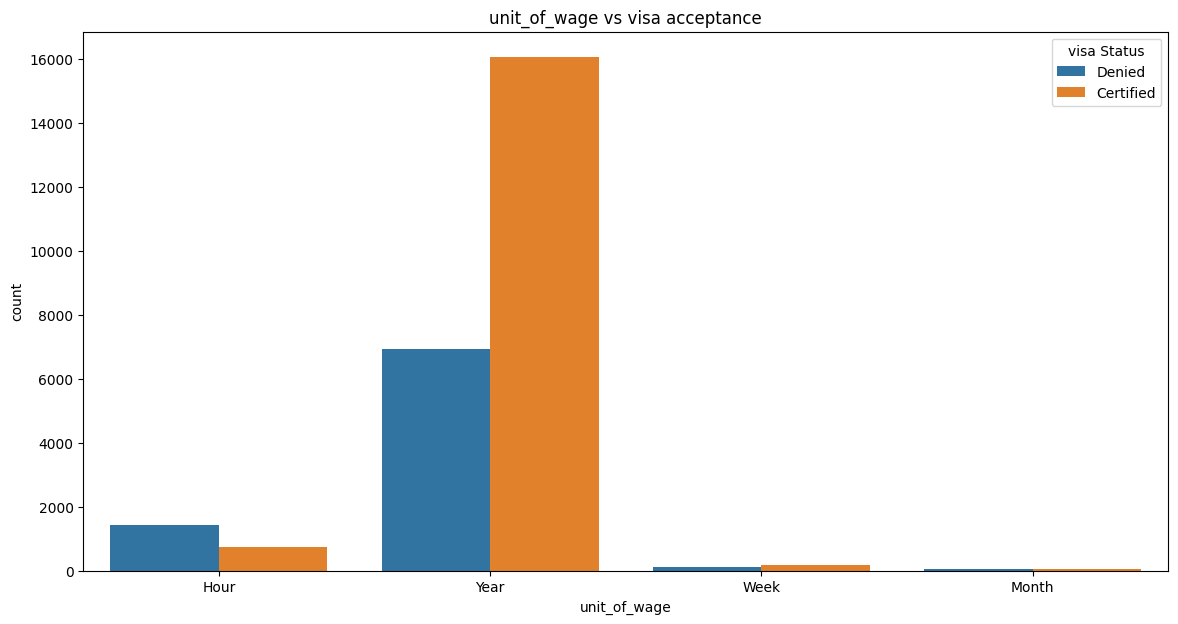

In [120]:
plt.subplots(figsize=(14,7))
sns.countplot(x='unit_of_wage', hue='case_status',data=data)
plt.title('unit_of_wage vs visa acceptance')
# plt.xlabel('Continent')
# plt.ylabel('count')
plt.legend(title="visa Status", fancybox=True)
plt.show()

In [121]:
 data.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

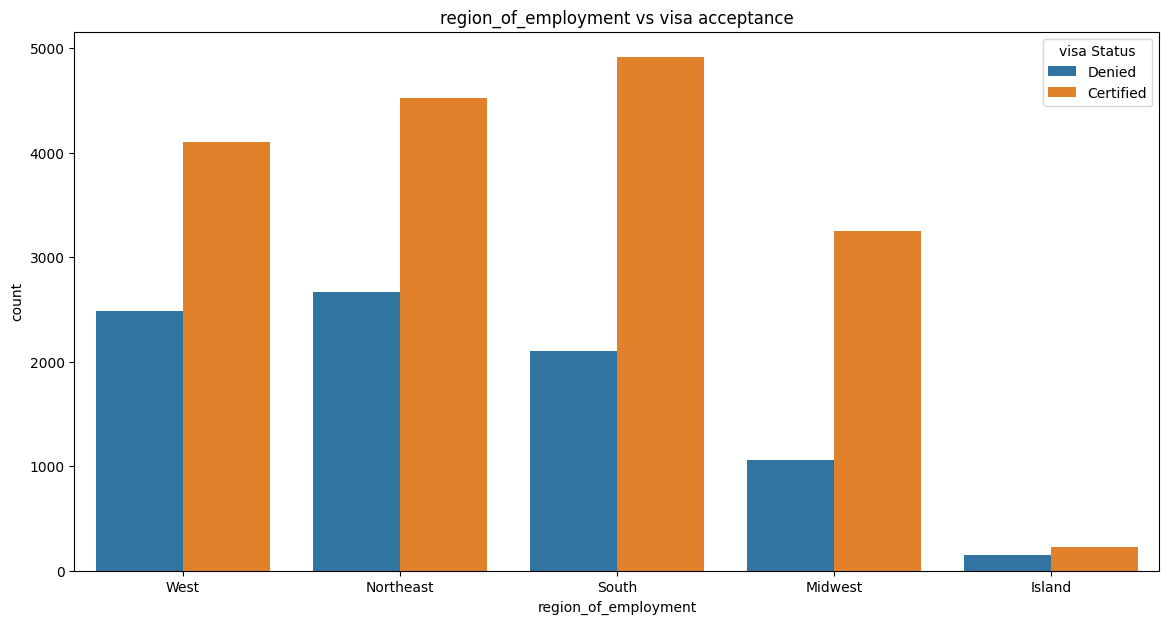

In [122]:
plt.subplots(figsize=(14,7))
sns.countplot(x='region_of_employment', hue='case_status',data=data)
plt.title('region_of_employment vs visa acceptance')
# plt.xlabel('Continent')
# plt.ylabel('count')
plt.legend(title="visa Status", fancybox=True)
plt.show()

Final report

* case_id column can be dropped as it is an ID.
* requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* no_of_employees, prevailing_wage columns have outllier which should be handled.
* continent columns has few unique values with very less count, which can be made as others
* Target column case_status is imbalanced can be handled before model building.

# Feature Engineering

In [175]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"EasyVisa.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)



Data Cleaning


* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

In [176]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [177]:

features_with_na

[]

Duplicate value

In [178]:

df.duplicated().sum()

0

In [179]:
df.drop('case_id', inplace=True, axis=1)

## feature engineering

In [180]:
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [181]:
current_year

2024

In [182]:
df['company_age'] = current_year-df['yr_of_estab']

In [183]:

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [184]:
df.drop('yr_of_estab', inplace=True, axis=1)

In [185]:

df.drop('case_id', inplace=True, axis=1)

KeyError: "['case_id'] not found in axis"

type of features

In [186]:

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


In [187]:

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


discrete features

In [188]:

discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [189]:

continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


split x and y

In [190]:

X = df.drop('case_status', axis=1)
y = df['case_status']

In [191]:

y.head()

,case_status
0,Denied
1,Certified
2,Denied
3,Denied
4,Certified


manual encoding

In [192]:
y= np.where(y=='Denied', 1,0)

In [193]:
y


array([1, 0, 1, ..., 0, 0, 0])


Feature Transformation

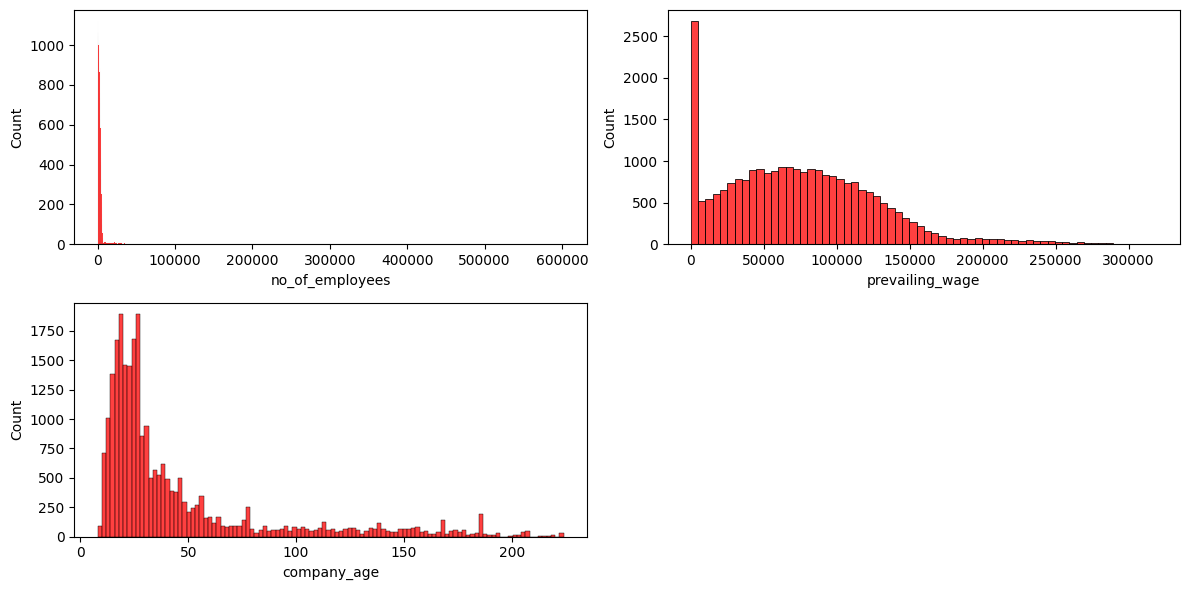

In [194]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='red')
    plt.xlabel(col)
    plt.tight_layout()

check for skewness

In [195]:

# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

,0
no_of_employees,12.265260
prevailing_wage,0.755776
company_age,2.037301


* Positiviely Skewed : company_age, no_of_employees.
* We can handle outliers and then check the skewness.


----
Apply Power Transformer to Check if it can reduces the outliers

In [196]:

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [197]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

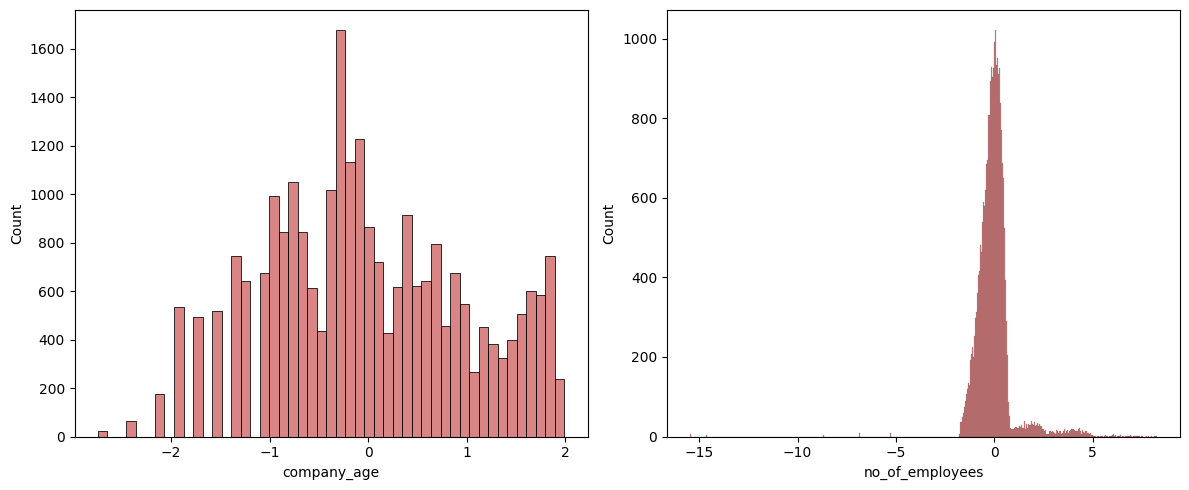

In [198]:

plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

checing skewness

In [199]:
X_copy.skew(axis=0, skipna=True)

,0
company_age,0.103264
no_of_employees,0.399339


Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
So Power Transformer with yeo-johnson can be used.

In [200]:

for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


Feature Encoding and Scaling

* One Hot Encoding for Columns which had lesser unique values and not ordinal

* Ordinal Encoding for Columns which has many unique categories

* Standard Scaler

* Power Transformer

---

Selecting number features for preprocessing

In [201]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [202]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [203]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [204]:
X = preprocessor.fit_transform(X)

In [205]:

X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])


Classification

In [206]:

from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

Train Test Split

In [207]:

from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13638, 24), (3410, 24))

In [208]:
!pip install catboost

In [216]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [217]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_clf(y_true, y_pred):
    '''
    This function takes in true values and predicted values
    Calculates the following metrics: Accuracy, F1-Score, Precision, Recall, ROC AUC score
    Returns: Tuple of metrics
    '''
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    return accuracy, f1, precision, recall, roc_auc

In [218]:

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [219]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    accuracy_list = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report

In [220]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9531
- F1 score: 0.9569
- Precision: 0.9528
- Recall: 0.9611
- Roc Auc Score: 0.9523


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9267
- F1 score: 0.9326
- Precision: 0.9296
- Recall: 0.9356
- Roc Auc Score: 0.9259


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8822
- F1 score: 0.8903
- Precision: 0.8945
- Recall: 0.8862
- Roc Auc Score: 0.8819
----------------------------------
Model performance for Test set
- Accuracy: 0.8956
- F1 score: 0.9031
- Precision: 0.9095
- Recall: 0.8967
- Roc Auc Score: 0.8955


Logistic Regression
Model performance for Training 

In [221]:

base_model_report

,Model Name,Accuracy
0,Random Forest,0.953079
4,K-Neighbors Classifier,0.940176
5,XGBClassifier,0.935191
6,CatBoosting Classifier,0.929619
1,Decision Tree,0.926686
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.744868



Here we can use Random Forest for Hyper Parameter Tuning

In [222]:

#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [225]:

# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]


Create a function for model training and report which can be used in hyperparameter tuning loop

In [226]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [227]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

Retraining the Model with best Parameters

In [228]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9560
- F1 score: 0.9594
- Precision: 0.9594
- Recall: 0.9594
- Roc Auc Score: 0.9557


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9733
- F1 score: 0.9757
- Precision: 0.9651
- Recall: 0.9865
- Roc Auc Score: 0.9721


XGBClassifier
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9993
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.9455
- F1 score: 0.9498
- Precision: 0.9487
- Recall: 0.9508
- Roc Auc Score: 0.9450




In [229]:

tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.973314
0,Random Forest Classifier,0.956012
2,XGBClassifier,0.945455


In [230]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



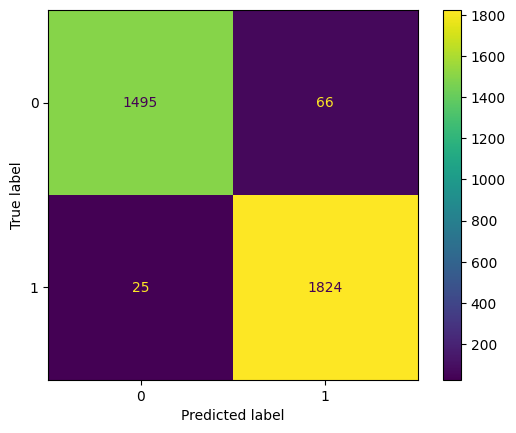

In [231]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)